## What is a Decision Tree?

    Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
        A decision tree is a support tool that uses a tree-like graph or model of decisions and their possible consequences. It is one way to display an algorithm that contains only conditional control statements.

        A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from the root to leaf represent classification rules.

### Problem Statement:


    To build a Decision Tree model for prediction of car quality given other attributes about the car.

    The model evaluates cars according to the following concept structure:

* CAR -> car acceptability
* PRICE -> overall price
* buying -> buying price
* maint -> price of the maintenance
* TECH -> technical characteristics
* COMFORT -> comfort
* doors -> number of doors
* persons -> capacity in terms of persons to carry
* lug_boot -> the size of luggage boot
* safety -> estimated safety of the car

 Input attributes are printed in lowercase.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the dataset

In [4]:
data = pd.read_csv('carData.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
data.shape

(1728, 7)

In [6]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

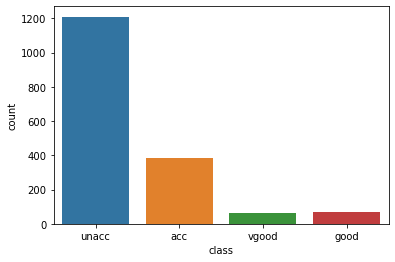

In [8]:
sns.countplot('class', data = data)

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='safety', ylabel='count'>

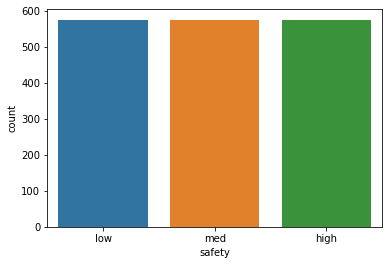

In [9]:
sns.countplot('safety' , data = data)

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='buying', ylabel='count'>

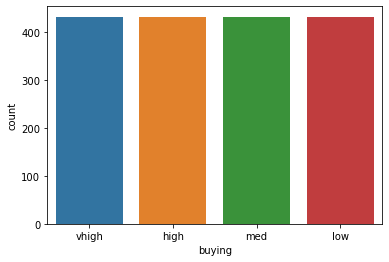

In [10]:
sns.countplot('buying' , data = data)

In [11]:
## Identify the target and predictor variables

data['buying'],_   = pd.factorize(data['buying'])
data['maint'],_    = pd.factorize(data['maint'])
data['doors'],_    = pd.factorize(data['doors'])
data['persons'],_  = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_   = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc


In [12]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 2, 1, 3])

In [14]:
y_inverse = le.inverse_transform([0,1,2,3])
y_inverse

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

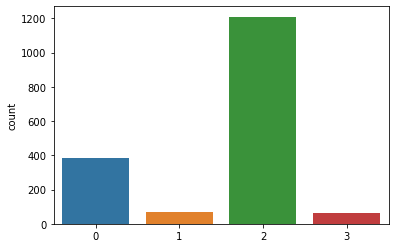

In [15]:
sns.countplot(y)

In [16]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test.shape)

(1209, 6)
(519, 6)
(519,)
(519,)


In [17]:
#train the decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Test Data and Make Prediction
# use the model to make predictions with the test data
y_pred = dtc.predict(X_test)

In [19]:
# What is the accuracy score?
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.97


In [20]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
count_misclassified

15

In [21]:
# How can we understand confusion matrix?
confusion_matrix(y_test, y_pred)

array([[104,   5,   6,   0],
       [  2,  23,   0,   0],
       [  1,   0, 362,   0],
       [  1,   0,   0,  15]])

In [22]:
# What is the classification report?
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       115
           1       0.82      0.92      0.87        25
           2       0.98      1.00      0.99       363
           3       1.00      0.94      0.97        16

    accuracy                           0.97       519
   macro avg       0.94      0.94      0.94       519
weighted avg       0.97      0.97      0.97       519

